## Problem statement

Use relevent machine learning model to predict whether person is diabetic or non diabetic.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
# Check data type of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# find unique values in outcome
data.Outcome.unique()

array([1, 0], dtype=int64)

In [8]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

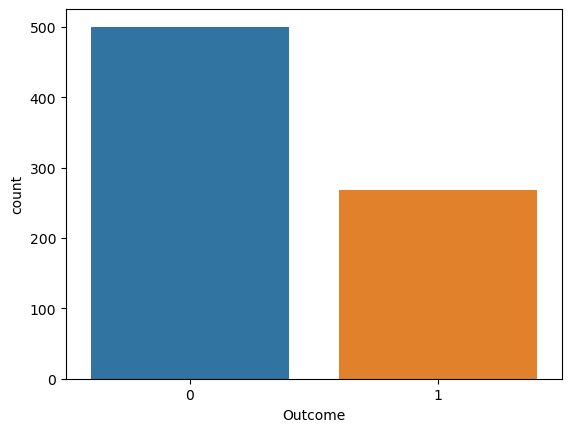

In [9]:
# check whether data is balanced or not
sns.countplot(x=data.Outcome)

### Insights
Cleary data is imbalanced since we have more records to non diabetic and less records related to diabetic.

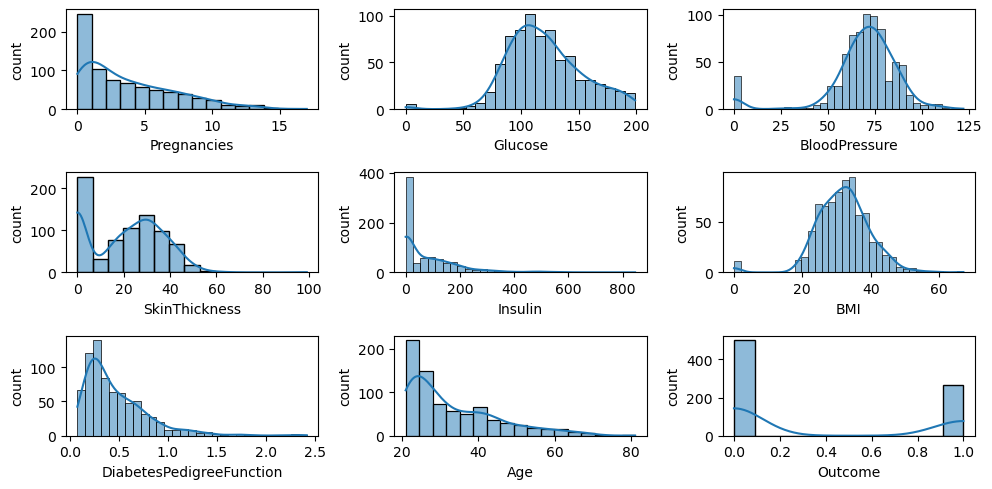

In [10]:
# Check for distribution of data
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Insights
Glucose , Bloodpressure and BMI are representing normal distribution

In [11]:
# Check for duplicates
data.duplicated().sum()

0

In [12]:
# Statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


data is corrupted because it shows that Glucose, BP, Insulin, Skinthickness, BMI has 0 has its values that means person is dead.

In [13]:
# Handle corrupted data
# Glucose, BP,Insulin, BMI, Skinthickness cannot haqve their value is zero.
# Replace all these zeros with median.

In [14]:
data['Glucose'].replace(0,data["Glucose"].median(),inplace=True)

In [15]:
data['BloodPressure'].replace(0,data['BloodPressure'].median(),inplace=True)

In [16]:
data["Insulin"].replace(0,data["Insulin"].median(),inplace=True)

In [17]:
data["BMI"].replace(0,data["BMI"].median(),inplace=True)

In [18]:
data["SkinThickness"].replace(0,data["SkinThickness"].median(),inplace=True)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


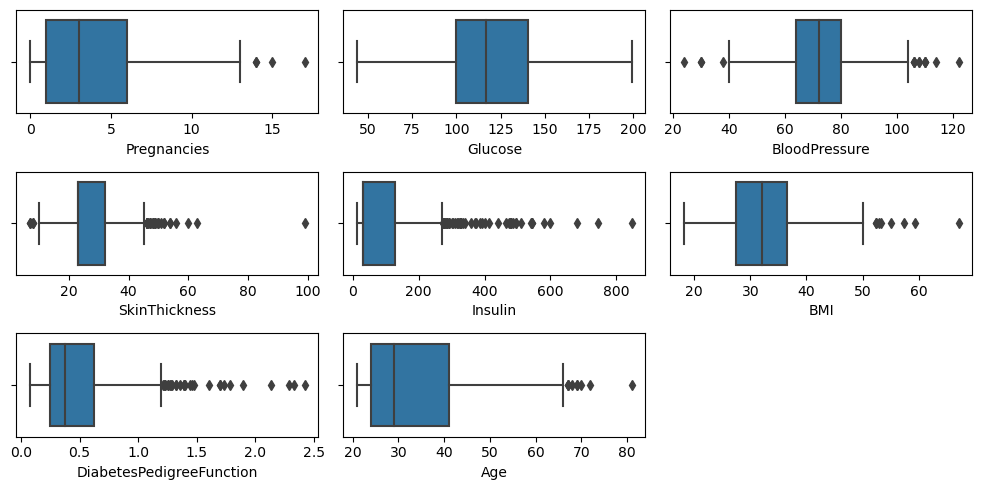

In [20]:
# Check for outliers
plt.figure(figsize=(10,5),facecolor="White")
plotnumber=1
for column in data.drop("Outcome",axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
    plotnumber+=1
plt.tight_layout()

### Insights
* We can seen that there are few outliers in preganancies, bloodpressure, Skinthickness, insulin BMI, Diabetespedigreefunction and age.
* Outliers in bloodpressure and skinthickness are seen both side.
* Outliers in preganancies, insulin, BMI, Diabetespedigreefunction and age are seen towards right side.
* There is no any outliers in glucose.

In [21]:
# Acording to histogram plot Glucose, bloodpressure and BMI are representing normal distribution.
# Other data is not normally distributed.

In [22]:
# For preganancies
q1_p=data["Pregnancies"].quantile(0.25)
print(q1_p)
q3_p=data["Pregnancies"].quantile(0.75)
print(q3_p)
IQR_p=q3_p-q1_p   # IQR for Pregnancies
print(IQR_p)
lower_limit_p=q1_p-1.5*IQR_p   # Find lower limit
print(lower_limit_p)
upper_limit_p=q3_p+1.5*IQR_p   # find upper limit
print(upper_limit_p)

1.0
6.0
5.0
-6.5
13.5


In [23]:
data.loc[data["Pregnancies"]>upper_limit_p]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110.0,37.1,0.153,43,1
159,17,163,72,41,114.0,40.9,0.817,47,1
298,14,100,78,25,184.0,36.6,0.412,46,1
455,14,175,62,30,30.5,33.6,0.212,38,1


In [24]:
data.loc[data["Pregnancies"]<lower_limit_p]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [25]:
len(data.loc[data["Pregnancies"]>upper_limit_p])/len(data)

0.005208333333333333

In [26]:
data.loc[data["Pregnancies"]>upper_limit_p,"Pregnancies"]=data["Pregnancies"].median()

<Axes: xlabel='Pregnancies'>

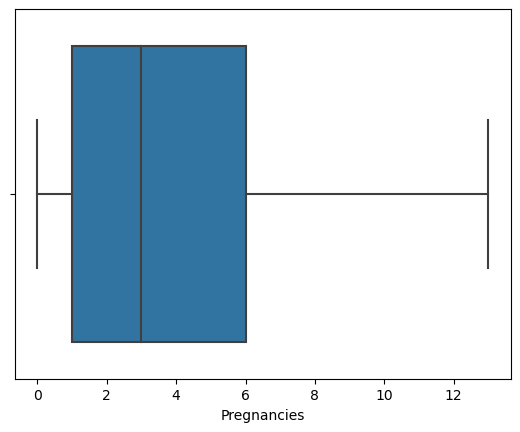

In [27]:
sns.boxplot(x=data["Pregnancies"])

In [28]:
# For BloodPressure
q1_bp=data["BloodPressure"].quantile(0.25)   # Find Q1 and Q3 Bloodpressure
print(q1_bp)
q3_bp=data["BloodPressure"].quantile(0.75)
print(q3_bp)

# IQR for Pregnancies
IQR_bp=q3_bp-q1_bp
print(IQR_bp)

64.0
80.0
16.0


In [29]:
# Find lower limit and upper limit
lower_limit_bp=q1_bp-1.5*IQR_bp
print(lower_limit_bp)
upper_limit_bp=q3_bp+1.5*IQR_bp
print(upper_limit_bp)

40.0
104.0


In [30]:
data.loc[data["BloodPressure"]>upper_limit_bp]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240.0,45.4,0.721,54,1
84,5,137,108,23,30.5,48.8,0.227,37,1
106,1,96,122,23,30.5,22.4,0.207,27,0
177,0,129,110,46,130.0,67.1,0.319,26,1
362,5,103,108,37,30.5,39.2,0.305,65,0
549,4,189,110,31,30.5,28.5,0.680,37,0
658,11,127,106,23,30.5,39.0,0.190,51,0
662,8,167,106,46,231.0,37.6,0.165,43,1
672,10,68,106,23,49.0,35.5,0.285,47,0
691,13,158,114,23,30.5,42.3,0.257,44,1


In [31]:
data.loc[data["BloodPressure"]<lower_limit_bp]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83.0,43.3,0.183,33,0
125,1,88,30,42,99.0,55.0,0.496,26,1
597,1,89,24,19,25.0,27.8,0.559,21,0
599,1,109,38,18,120.0,23.1,0.407,26,0


In [32]:
len(data.loc[data["BloodPressure"]>upper_limit_bp])/len(data)

0.013020833333333334

In [33]:
data.loc[data["BloodPressure"]>upper_limit_bp,"BloodPressure"]=data["BloodPressure"].median()

In [34]:
data.loc[data["BloodPressure"]<lower_limit_bp,"BloodPressure"]=data["BloodPressure"].median()

<Axes: xlabel='BloodPressure'>

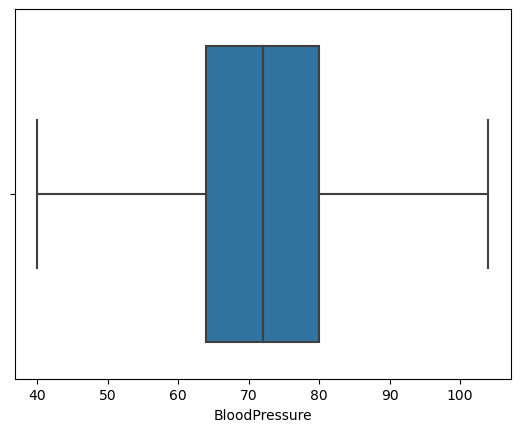

In [35]:
sns.boxplot(x=data["BloodPressure"])

In [36]:
#For Skinthickness 
# Find q1 and q3 for skinthickness
q1_skinthickness=data["SkinThickness"].quantile(0.25)
q3_skinthickness=data["SkinThickness"].quantile(0.75)
IQR_skinthickness=q3_skinthickness-q1_skinthickness    # Find IQR
lower_limit_skinthickness=q1_skinthickness-1.5*IQR_skinthickness
upper_limit_skinthickness=q3_skinthickness+1.5*IQR_skinthickness

In [37]:
len(data.loc[data["SkinThickness"]>upper_limit_skinthickness])/len(data)

0.040364583333333336

In [38]:
data.loc[data["SkinThickness"]>upper_limit_skinthickness,"SkinThickness"]=data["SkinThickness"].median()

In [39]:
len(data.loc[data["SkinThickness"]<lower_limit_skinthickness])/len(data)

0.005208333333333333

In [40]:
data.loc[data["SkinThickness"]<lower_limit_skinthickness,"SkinThickness"]=data["SkinThickness"].median()

<Axes: xlabel='SkinThickness'>

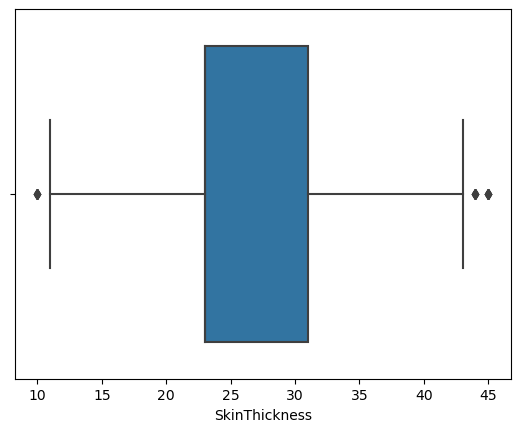

In [41]:
sns.boxplot(x=data["SkinThickness"])

In [42]:
# For insulin
# Find Q1 and Q3 for insulin
Q1=data["Insulin"].quantile(0.25)
Q3=data["Insulin"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [43]:
len(data.loc[data["Insulin"]>upper_limit])/len(data)

0.06380208333333333

In [44]:
data.loc[data["Insulin"]>upper_limit,"Insulin"]=data["Insulin"].median()

<Axes: xlabel='Insulin'>

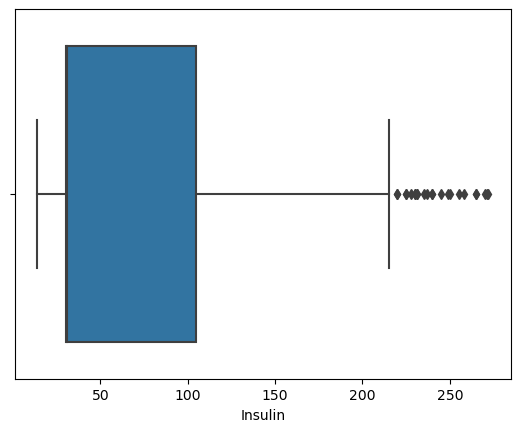

In [45]:
sns.boxplot(x=data["Insulin"])

In [46]:
### Scaling data [Normalization or standardization]

In [47]:
# Min Max scaler
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
df=["Pregnancies",'Outcome']
data1=scaling.fit_transform(data.drop(df,axis=1))

In [48]:
data1

array([[0.67096774, 0.5       , 0.71428571, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.40625   , 0.54285714, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.375     , 0.37142857, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.5       , 0.37142857, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.3125    , 0.37142857, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46875   , 0.6       , ..., 0.24948875, 0.10119556,
        0.03333333]])

In [49]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [51]:
df1=data[["Pregnancies","Outcome"]]

In [52]:
new_data=pd.concat([data2,df1],axis=1)
new_data


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.50000,0.714286,0.063953,0.314928,0.234415,0.483333,6,1
1,0.264516,0.40625,0.542857,0.063953,0.171779,0.116567,0.166667,1,0
2,0.896774,0.37500,0.371429,0.063953,0.104294,0.253629,0.183333,8,1
3,0.290323,0.40625,0.371429,0.310078,0.202454,0.038002,0.000000,1,0
4,0.600000,0.00000,0.714286,0.596899,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.56250,0.371429,0.643411,0.300613,0.039710,0.700000,10,0
764,0.503226,0.46875,0.485714,0.063953,0.380368,0.111870,0.100000,2,0
765,0.496774,0.50000,0.371429,0.379845,0.163599,0.071307,0.150000,5,0
766,0.529032,0.31250,0.371429,0.063953,0.243354,0.115713,0.433333,1,1


In [53]:
new_data.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.208368,0.146822,0.130336,0.231400,0.137327,0.266909,0.117692,0.492782
BloodPressure,0.208368,1.000000,0.131568,-0.034569,0.277143,0.012825,0.314275,0.188720,0.166424
SkinThickness,0.146822,0.131568,1.000000,0.178914,0.462125,0.091802,0.054037,0.084825,0.171207
Insulin,0.130336,-0.034569,0.178914,1.000000,0.167332,0.154217,-0.069820,-0.082815,0.078957
BMI,0.231400,0.277143,0.462125,0.167332,1.000000,0.153506,0.025744,0.008726,0.312249
DiabetesPedigreeFunction,0.137327,0.012825,0.091802,0.154217,0.153506,1.000000,0.033561,-0.031514,0.173844
Age,0.266909,0.314275,0.054037,-0.069820,0.025744,0.033561,1.000000,0.543776,0.238356
Pregnancies,0.117692,0.188720,0.084825,-0.082815,0.008726,-0.031514,0.543776,1.000000,0.202492
Outcome,0.492782,0.166424,0.171207,0.078957,0.312249,0.173844,0.238356,0.202492,1.000000


<Axes: >

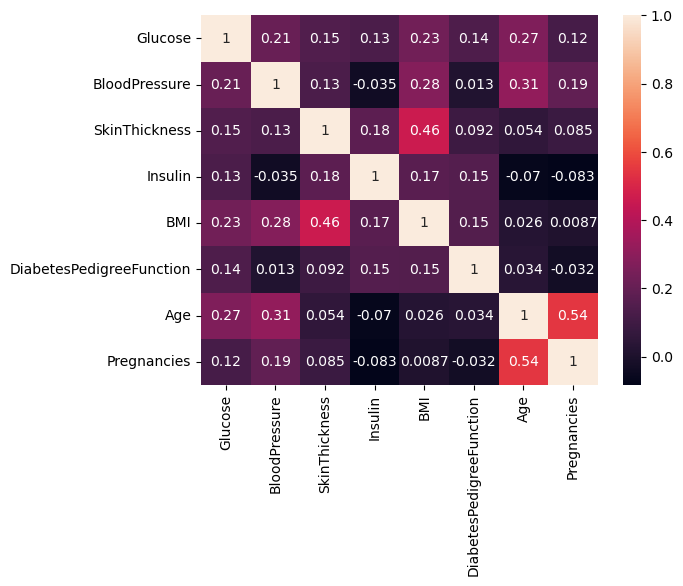

In [54]:
sns.heatmap(new_data.drop("Outcome",axis=1).corr(),annot=True)

In [55]:
## Model building
# Split data into x and y
x=new_data.drop("Outcome",axis=1)
y=new_data[["Outcome"]]

In [56]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [57]:
x_train.shape

(537, 8)

In [58]:
x_test.shape

(231, 8)

### Apply Logistic regression

In [59]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
acc=[]
roc=[]
# Initialize
model=LogisticRegression()
# Train model with x_train,y_train
model.fit(x_train,y_train)

LogisticRegression()

In [60]:
# Make prediction using x_test
y_pred=model.predict(x_test)

In [61]:
# Accuracy_score
score=accuracy_score(y_test,y_pred)
acc.append(score)

In [62]:
# ROC-AUC Score
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
roc.append(roc_auc_score)
print("\nAccuracy {0} ROC {1}".format(score,roc_auc_score))


Accuracy 0.7402597402597403 ROC 0.6553193320709244


### Apply SVM

In [63]:
y.value_counts()

Outcome
0          500
1          268
dtype: int64

In [64]:
## balancing the data
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [65]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [66]:
## Counter is a container which keeps track to how many times equivalent  values are added. Python counter class is a part of collection module.

In [67]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({'Outcome': 1})
SMOTE Classes Counter({'Outcome': 1})


In [68]:
# Apply SVM
from sklearn.svm import SVC
svclassifire=SVC()
svclassifire.fit(x_smote,y_smote)

SVC()

In [69]:
# Predict output for x_test
y_pred=svclassifire.predict(x_test)

In [70]:
## Evaluating the model created
score=accuracy_score(y_test,y_pred)
acc.append(score)

In [71]:
# ROC-AUC Score
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
roc.append(roc_auc_score)
print("\nAccuracy {0} ROC {1}".format(score,roc_auc_score))


Accuracy 0.6926406926406926 ROC 0.6881563091754175


### Apply KNN

In [72]:
# model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [73]:
y_pred=model.predict(x_test)

In [74]:
score=accuracy_score(y_pred,y_test)
acc.append(score)

In [75]:
# ROC-AUC Score
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
roc.append(roc_auc_score)
print("\nAccuracy {0} ROC {1}".format(score,roc_auc_score))


Accuracy 0.7229437229437229 ROC 0.6175761749010157


### Apply Random Forest

In [76]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
y_pred=model.predict(x_test)

In [78]:
score=accuracy_score(y_test,y_pred)
acc.append(score)

In [79]:
# ROC-AUC Score
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
roc.append(roc_auc_score)
print("\nAccuracy {0} ROC {1}".format(score,roc_auc_score))


Accuracy 0.7489177489177489 ROC 0.6866930624892409


### Apply Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [81]:
y_pred=model.predict(x_test)

In [82]:
score=accuracy_score(y_test,y_pred)
acc.append(score)

In [83]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
roc.append(roc_auc_score)
print("\nAccuracy {0} ROC {1}".format(score,roc_auc_score))


Accuracy 0.7316017316017316 ROC 0.6739542089860562


### Apply Gradient Boosting

In [84]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.2)
model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [85]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
acc.append(score)

In [86]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
roc.append(roc_auc_score)
print("\nAccuracy {0} ROC {1}".format(score,roc_auc_score))


Accuracy 0.7316017316017316 ROC 0.6775262523670167


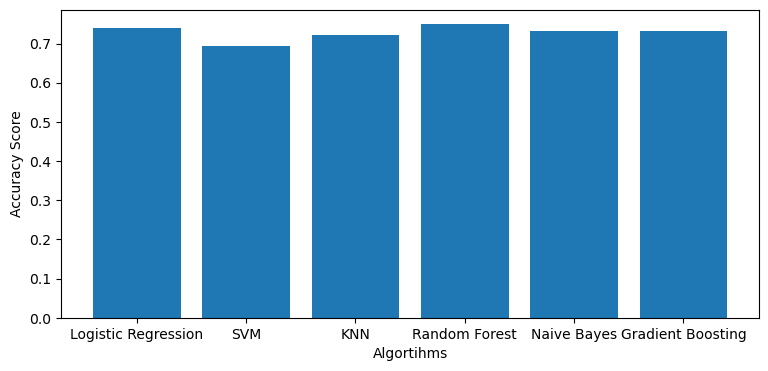

In [87]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naive Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

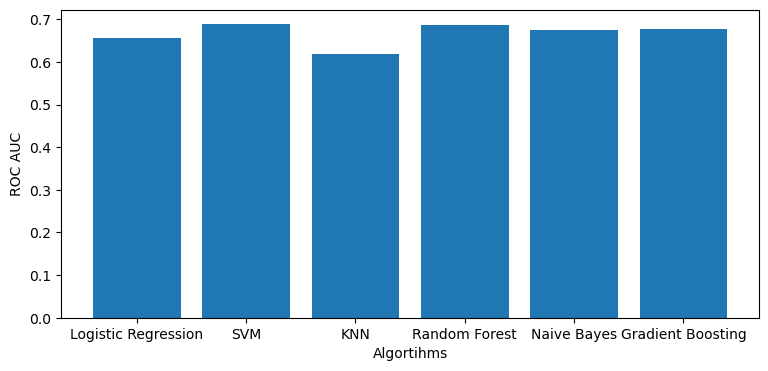

In [88]:
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naive Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

In [89]:
#Random forest has highest accuracy and ROC_AUC curve 
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient
#model can be improve with fine tunning
